In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
titanic_data = pd.read_csv('titanic.csv')

In [163]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Zacznijmy od tego, że kolumny takie jak : imię, nazwa biletu są zupełnie niepotrzebne - imię nie wpływa na przeżywalność podobnie jak nazwa biletu. Cena bilety jest bezpośrednio związana z klasą pasażera oraz numerem kabiny, dlatego tych dwóch rzeczy również się możemy pozbyć

In [164]:
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis=1)


Zamienię 'male' i 'female' na binarną klasyfikację

In [165]:
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})

Sprawdzanie brakujących danych

In [166]:
def get_percentage_missing(df, axis):
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [167]:
missing_cols_mi = get_percentage_missing(titanic_data, axis=0)
missing_cols_mi

Age         19.87
Embarked     0.22
dtype: float64

Zauważyłem, że dużo wierszów z wiekiem jest nieuzupelnionych

In [168]:
titanic_data.loc[888]

PassengerId    889
Survived         0
Pclass           3
Sex              0
Age            NaN
SibSp            1
Parch            2
Embarked         S
Name: 888, dtype: object

Wyświetliłem przykładowy wiersz z NaN w wieku

Mam teorię - jeżeli ludzie przeżyli katastrofę, to napewno ktoś ich potem wypytał o wiek, w takim razie braki w tych danych powinny świadczyć o śmierci pasażera. Sprawdźmy to dokładnie

In [169]:
no_age_total = titanic_data['Age'].isna().sum() 
no_age_died = titanic_data[(titanic_data['Age'].isna()) & (titanic_data['Survived']==0)].shape[0]
no_age_survived = titanic_data[(titanic_data['Age'].isna()) & (titanic_data['Survived']==1)].shape[0] 

print(f"Bez wieku - razem: {no_age_total}")
print(f"Bez wieku - zginęli: {no_age_died}") 
print(f"Bez wieku - przeżyli: {no_age_survived}")

Bez wieku - razem: 177
Bez wieku - zginęli: 125
Bez wieku - przeżyli: 52


Widzimy, że nasza teoria, w części się sprawdza, zwizualizujmy sobie te danę, aby zobaczyć co robić dalej

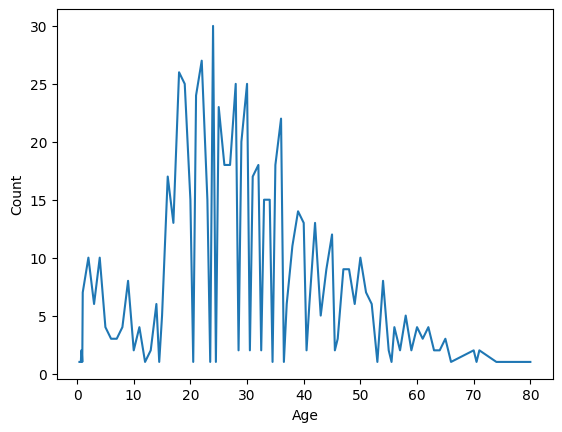

In [170]:
age_counts = titanic_data['Age'].value_counts().sort_index()

plt.plot(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Wykres jest asymetryczny - mając to na uwadzę, kusi, aby uzupełnić brakujące wartości medianą wieku, ale to nie było by dobre rozwiązanie, wrocę do tego później

Dane dla róznych miejsc wsiadania

In [171]:
C_data = titanic_data[titanic_data['Embarked']=='C']
S_data = titanic_data[titanic_data['Embarked']=='S']
Q_data = titanic_data[titanic_data['Embarked']=='Q']

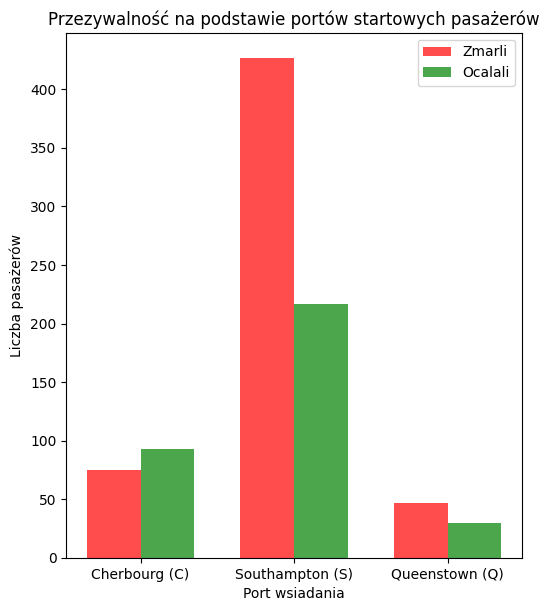

In [172]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 2)
    
# Przygotowanie danych
ports = ['C', 'S', 'Q']
zmarli = [len(C_data) - C_data['Survived'].sum(),
        len(S_data) - S_data['Survived'].sum(), 
        len(Q_data) - Q_data['Survived'].sum()]
ocalali = [C_data['Survived'].sum(),
        S_data['Survived'].sum(),
        Q_data['Survived'].sum()]

x = np.arange(len(ports))
width = 0.35

plt.bar(x - width/2, zmarli, width, label='Zmarli', color='red', alpha=0.7)
plt.bar(x + width/2, ocalali, width, label='Ocalali', color='green', alpha=0.7)

plt.title('Przezywalność na podstawie portów startowych pasażerów')
plt.xlabel('Port wsiadania')
plt.ylabel('Liczba pasażerów')
plt.xticks(x, ['Cherbourg (C)', 'Southampton (S)', 'Queenstown (Q)'])
plt.legend()

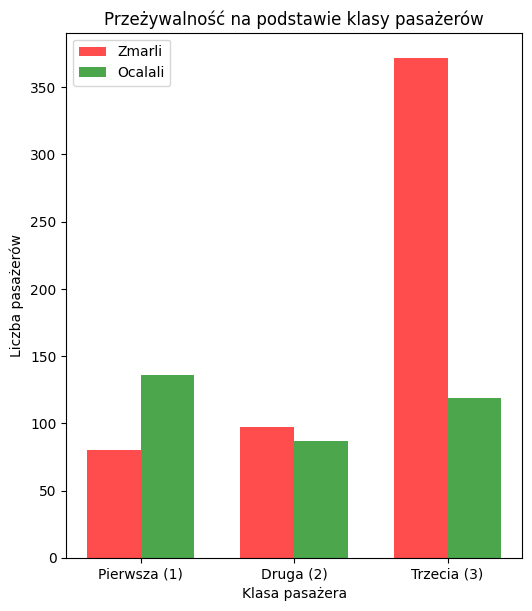

In [173]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 2)

# Przygotowanie danych dla każdej klasy
class1_data = titanic_data[titanic_data['Pclass'] == 1]
class2_data = titanic_data[titanic_data['Pclass'] == 2]
class3_data = titanic_data[titanic_data['Pclass'] == 3]

# Przygotowanie danych
classes = ['1', '2', '3']
zmarli = [len(class1_data) - class1_data['Survived'].sum(),
          len(class2_data) - class2_data['Survived'].sum(), 
          len(class3_data) - class3_data['Survived'].sum()]
ocalali = [class1_data['Survived'].sum(),
           class2_data['Survived'].sum(),
           class3_data['Survived'].sum()]

x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, zmarli, width, label='Zmarli', color='red', alpha=0.7)
plt.bar(x + width/2, ocalali, width, label='Ocalali', color='green', alpha=0.7)

plt.title('Przeżywalność na podstawie klasy pasażerów')
plt.xlabel('Klasa pasażera')
plt.ylabel('Liczba pasażerów')
plt.xticks(x, ['Pierwsza (1)', 'Druga (2)', 'Trzecia (3)'])
plt.legend()

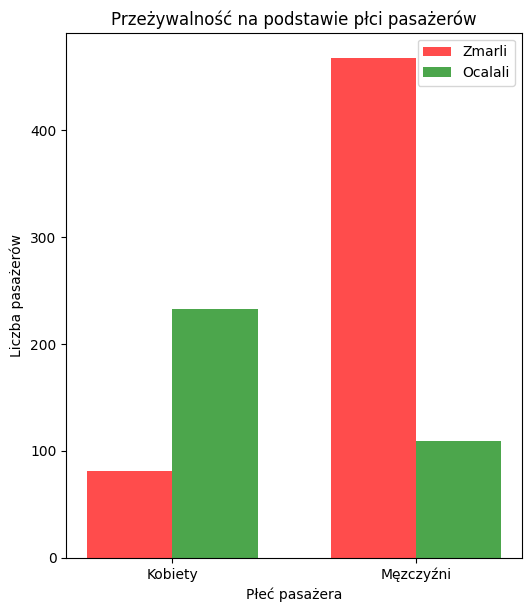

In [174]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 2)

female_data = titanic_data[titanic_data['Sex'] == 0]
male_data = titanic_data[titanic_data['Sex'] == 1]

# Przygotowanie danych
classes = ['1', '2']
zmarli = [len(female_data) - female_data['Survived'].sum(),
          len(male_data) - male_data['Survived'].sum()]
ocalali = [female_data['Survived'].sum(),
           male_data['Survived'].sum()]

x = np.arange(len(classes))
width = 0.35

plt.bar(x - width/2, zmarli, width, label='Zmarli', color='red', alpha=0.7)
plt.bar(x + width/2, ocalali, width, label='Ocalali', color='green', alpha=0.7)

plt.title('Przeżywalność na podstawie płci pasażerów')
plt.xlabel('Płeć pasażera')
plt.ylabel('Liczba pasażerów')
plt.xticks(x, ['Kobiety', 'Męzczyźni'])
plt.legend()

Uzupełniam wiek na podstawie mediany w grupach

In [175]:
titanic_data['Age'] = titanic_data.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [176]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,S
887,888,1,1,0,19.0,0,0,S
888,889,0,3,0,21.5,1,2,S
889,890,1,1,1,26.0,0,0,C


In [177]:
missing_cols_mi = get_percentage_missing(titanic_data, axis=0)
missing_cols_mi

Embarked    0.22
dtype: float64

Jest to bardzo nie wielki wynik, dlaego po prostu uzupłenię te wartości najczęściej wystepujym elemetnem

In [178]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [179]:
missing_cols_mi = get_percentage_missing(titanic_data, axis=0)
missing_cols_mi

Series([], dtype: float64)

In [180]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Dodanie nowych cech związanych z rodziną

In [181]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

Są to istotne sprawy - ktoś bez rodziny może skupić się na ratowaniu tylko siebie nawzajem

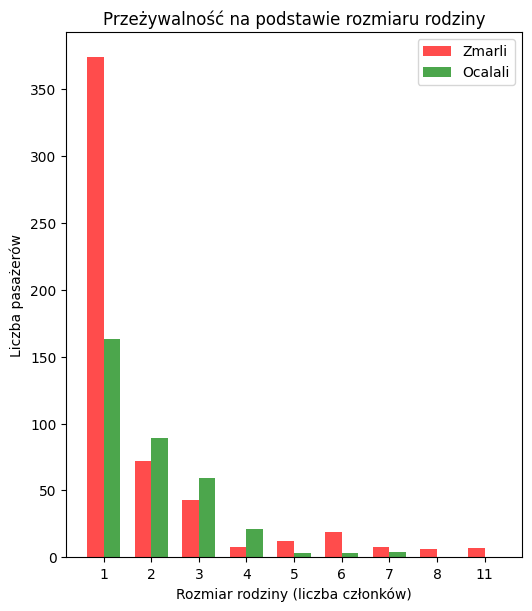

In [182]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 2)

family_sizes = sorted(titanic_data['FamilySize'].unique())
zmarli = []
ocalali = []

for size in family_sizes:
    family_data = titanic_data[titanic_data['FamilySize'] == size]
    zmarli.append(len(family_data) - family_data['Survived'].sum())
    ocalali.append(family_data['Survived'].sum())

x = np.arange(len(family_sizes))
width = 0.35

plt.bar(x - width/2, zmarli, width, label='Zmarli', color='red', alpha=0.7)
plt.bar(x + width/2, ocalali, width, label='Ocalali', color='green', alpha=0.7)

plt.title('Przeżywalność na podstawie rozmiaru rodziny')
plt.xlabel('Rozmiar rodziny (liczba członków)')
plt.ylabel('Liczba pasażerów')
plt.xticks(x, family_sizes)
plt.legend()

In [183]:
titanic_data = titanic_data.drop(['PassengerId','SibSp', 'Parch'], axis=1)

In [184]:
titanic_data

,Survived,Pclass,Sex,Age,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,0,2,0
1,1,1,0,38.0,1,2,0
2,1,3,0,26.0,0,1,1
3,1,1,0,35.0,0,2,0
4,0,3,1,35.0,0,1,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,1,1
887,1,1,0,19.0,0,1,1
888,0,3,0,21.5,0,4,0
889,1,1,1,26.0,1,1,1


Dane są przygotowanie do treneowania - nie ma zadnych brakującyh wartości i wszystkie wartości są numeryczne